In [1]:
import numpy as np
from pybandgap.set_structure import SetStructure, Material
from pybandgap.fem import global_matrixes
from pybandgap.bandgap import bandgap
from meshes.truss_like_mesh import truss_like_cross

meshes,*_ = truss_like_cross()

In [2]:
aluminum = Material('aluminum', young_modulus=70e9, poisson_ratio=0.33, density=2.7e3)
tungsten = Material('tungsten', young_modulus=411e9, poisson_ratio=0.28, density=19.3e3)

In [3]:
structure = SetStructure(meshes = meshes)
elements_IBZ, condition_IBZ= structure.find_irreducible_brillouin_zone()

In [4]:
tungsten_elements = [1, 2, 4, 8]
max_diameter_elements = np.append(tungsten_elements, 13)

In [5]:
material_elements = np.array([
    tungsten if i in tungsten_elements else aluminum
    for i in elements_IBZ])

diameters_elements = np.array([
    0.008 if i in max_diameter_elements else 0.004
    for i in elements_IBZ])

In [6]:
structure.set_prop('materials', material_elements, 0)
structure.set_prop('diameters', diameters_elements, 0)

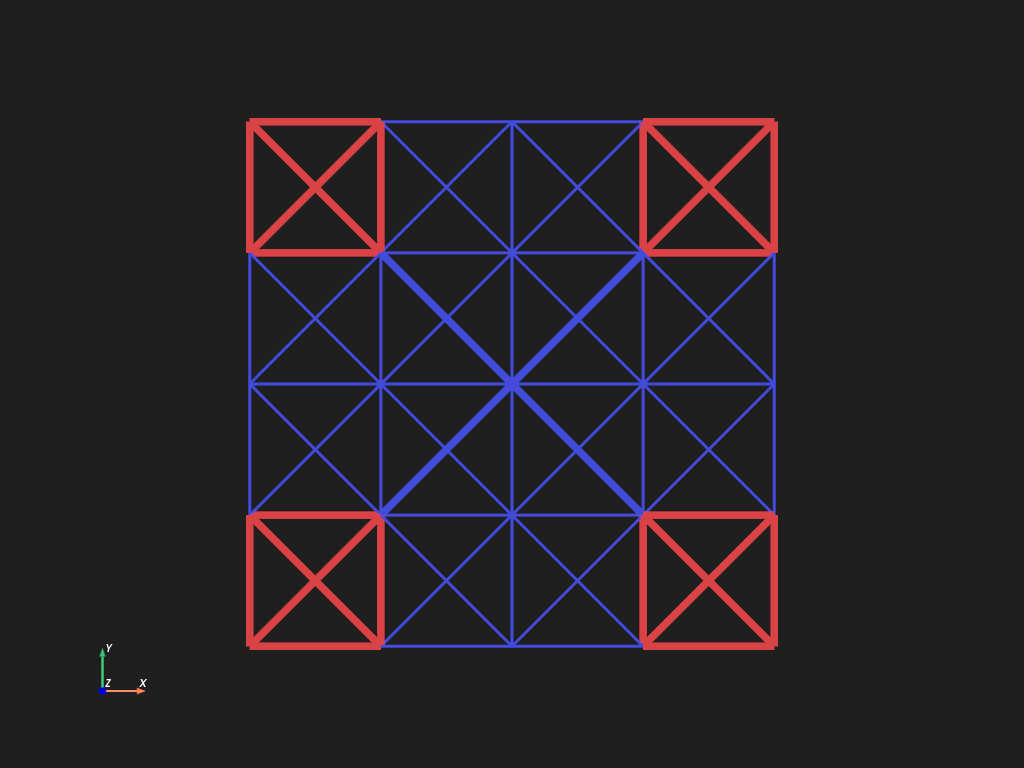

In [7]:
structure.show_structure()

In [8]:
M_global, K_global = global_matrixes(structure)

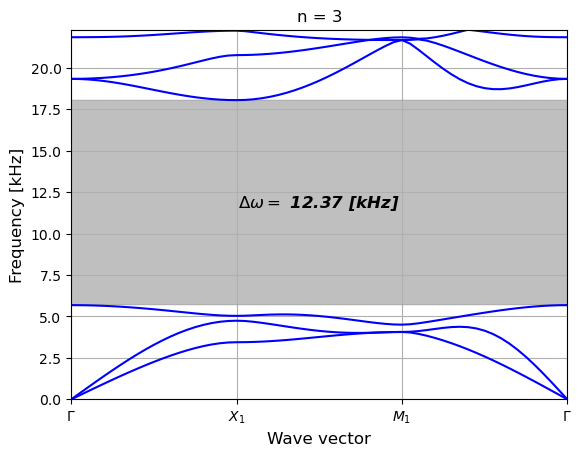

In [9]:
_ = bandgap(3, structure, M_global, K_global, N_eig = 6, plot= True, NINT=60, tol = 1e-15, max_it = 200)

# References
- Quinteros, L., Meruane, V., & Cardoso, E. L. (2021). Phononic band gap optimization in truss-like cellular structures using smooth P-norm approximations. Structural and Multidisciplinary Optimization, 64(1), 113–124. doi:10.1007/s00158-021-02862-x 